# What helps a game succeed?

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [381]:
# Loading all the libraries
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st

### Load data

[Load the project data and have a look at the general information.]

In [382]:
# Load the data file into a DataFrame
try:
    ice = pd.read_csv('/datasets/games.csv')
except:
    ice = pd.read_csv('C:/Users/Lorenzo Santos/OneDrive/Documents/games.csv')
    #added because for working locally just incase

old_ice = ice.copy(deep=False) #for comparison later https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

### Prepare data

[Explore table to get an initial understanding of the data. Do necessary corrections to the table if necessary.]

In [383]:
# print the general/summary information about the DataFrame

ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [384]:
# Print a sample of data for plans
print(ice.corr())
ice.head(10)

                 Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
Year_of_Release         1.000000 -0.092500  0.003978 -0.168366     0.037820   
NA_sales               -0.092500  1.000000  0.765335  0.449594     0.638649   
EU_sales                0.003978  0.765335  1.000000  0.435061     0.722792   
JP_sales               -0.168366  0.449594  0.435061  1.000000     0.291089   
Other_sales             0.037820  0.638649  0.722792  0.291089     1.000000   
Critic_Score            0.011411  0.240755  0.220752  0.152593     0.198554   

                 Critic_Score  
Year_of_Release      0.011411  
NA_sales             0.240755  
EU_sales             0.220752  
JP_sales             0.152593  
Other_sales          0.198554  
Critic_Score         1.000000  


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [421]:
#https://pastebin.com/Wmr2cBZ4
#print(ice.corr())
ice_columns = list(ice.columns)
lower = [col.lower() for col in ice_columns]
ice.columns = lower
ice.head(10)

#.dropna().reset_index(drop=True)

#ratings missing, too much time to search,could fill all with RP rating pending, then remove them. 
ice['rating'] = ice['rating'].fillna('RP')
ice['user_score'] = ice['user_score'].fillna(ice.query('user_score != "tbd"').reset_index(drop=True)['user_score'].median())
ice = ice.query('user_score != "tbd"').reset_index(drop=True)
ice = ice[ice['year_of_release'].notna() == True]
#This way our dataset will become much poorer, losing more than 50% of our data that contain information about sales, release date, and platform.
ice = ice[ice['name'].notna() == True]

#print(ice.query('user_score != "tbd"').reset_index(drop=True)['user_score'].median()) #to check
#user_score_median = ice.query('user_score != "tbd"').reset_index(drop=True)['user_score'].median()

#print(ice['user_score'].value_counts())

#ao was upseting avg_sales with only 1 game in the dataframe so it had to go.
#print(ice['rating'].value_counts())   
#ratings k-a, ao, and ec only all have less than 6 games put together in the dataframe so they needed to go
ice = ice.query('rating != "k-a"')
ice = ice.query('rating != "ec"')
ice = ice.query('rating != "ao"')
print(ice['rating'].value_counts())

print(ice['user_score'].value_counts())
ice['na_sales'] = ice['na_sales'].fillna(ice['na_sales'].median())
ice['eu_sales'] = ice['eu_sales'].fillna(ice['eu_sales'].median())
ice['jp_sales'] = ice['jp_sales'].fillna(ice['jp_sales'].median())
ice['other_sales'] = ice['other_sales'].fillna(ice['other_sales'].median())
ice['critic_score'] = ice['critic_score'].fillna(ice['critic_score'].median())
ice.info()

print(14068/16715 * 100,"% of original dataframe left")

rp      6627
t       2536
e       2373
m       1494
e10+    1033
Name: rating, dtype: int64
7.5    6854
7.8     322
8.0     285
8.2     276
8.3     252
       ... 
1.9       2
9.6       2
0.9       2
9.7       1
0.0       1
Name: user_score, Length: 95, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14063 entries, 0 to 14064
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14063 non-null  object 
 1   platform         14063 non-null  object 
 2   year_of_release  14063 non-null  int64  
 3   genre            14063 non-null  object 
 4   na_sales         14063 non-null  float64
 5   eu_sales         14063 non-null  float64
 6   jp_sales         14063 non-null  float64
 7   other_sales      14063 non-null  float64
 8   critic_score     14063 non-null  float64
 9   user_score       14063 non-null  float64
 10  rating           14063 non-null  object 
 11  total_sales      1406

Removed NaNs, and filled with sales and critic score with medians due to possible outliers. Keeping rating pending and tbd due to keep stats.


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [422]:
ice['user_score'] = ice['user_score'].astype('float')
ice['year_of_release'] = ice['year_of_release'].astype('int')

def underscore(element):
    new_element = element.split(" ")
    element = "_".join(new_element)
    return element

ice['platform'] = ice['platform'].apply(underscore).str.lower()
ice['name'] = ice['name'].apply(underscore).str.lower()
ice['genre'] = ice['genre'].apply(underscore).str.lower()
ice['rating'] = ice['rating'].apply(underscore).str.lower()


ice['total_sales'] = ice['na_sales'] + ice['eu_sales'] + ice['jp_sales'] + ice['other_sales']

Changed user_score to float. Snake_cased and lowercased data.

In [423]:
ice

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii_sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super_mario_bros.,nes,1985,platform,29.08,3.58,6.81,0.77,72.0,7.5,rp,40.24
2,mario_kart_wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii_sports_resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon_red/pokemon_blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,72.0,7.5,rp,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
14060,samurai_warriors:_sanada_maru,ps3,2016,action,0.00,0.00,0.01,0.00,72.0,7.5,rp,0.01
14061,lma_manager_2007,x360,2006,sports,0.00,0.01,0.00,0.00,72.0,7.5,rp,0.01
14062,haitaka_no_psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,72.0,7.5,rp,0.01
14063,spirits_&_spells,gba,2003,platform,0.01,0.00,0.00,0.00,72.0,7.5,rp,0.01


### Analyze data

#### Gaming by Year

[Look at how many games were released in different years. Is the data for every period significant?]

<AxesSubplot:title={'center':'gaming by year'}, xlabel='year_of_release', ylabel='number of games'>

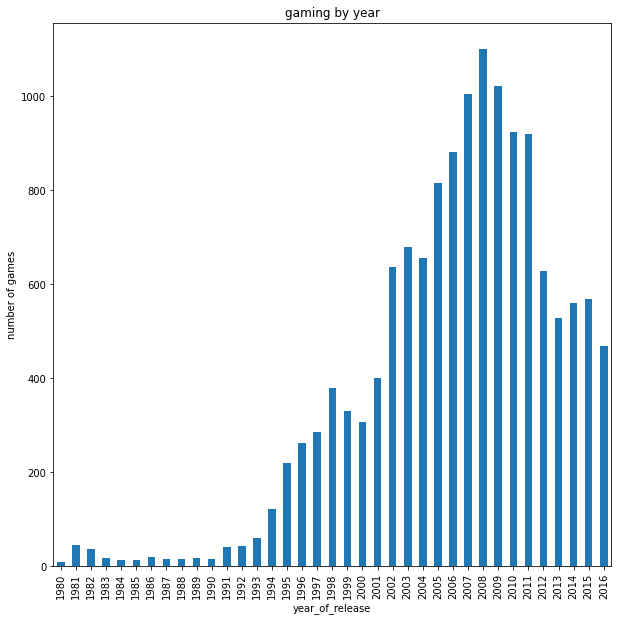

In [424]:
yearly_gaming = ice.pivot_table(index='year_of_release',values='name',aggfunc='count')
#check the amount of games per year by name
yearly_gaming.plot(title='gaming by year',ylabel='number of games',kind='bar',figsize=(10,10),legend=False)

Seemingly enough, we can forget about pre 1996 data.

#### Gaming by Platform

[Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?]

Index(['ps2', 'x360', 'ps3', 'wii', 'ps'], dtype='object', name='platform')

Index(['gb', 'wii', 'x360', 'ps4', 'ps3'], dtype='object', name='platform')


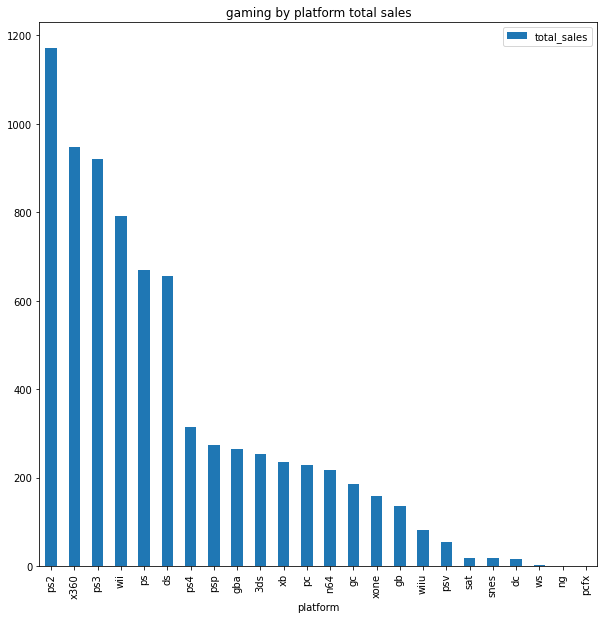

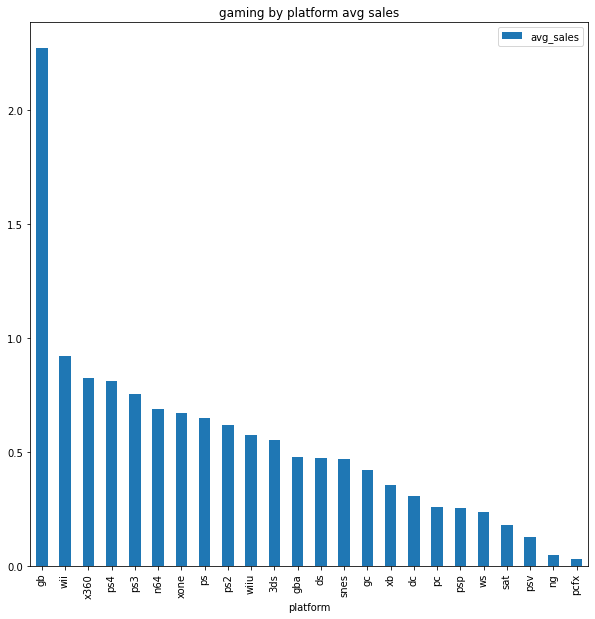

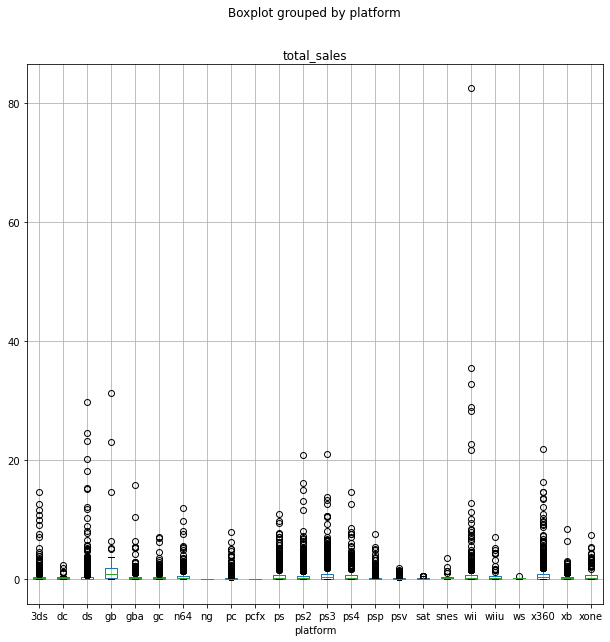

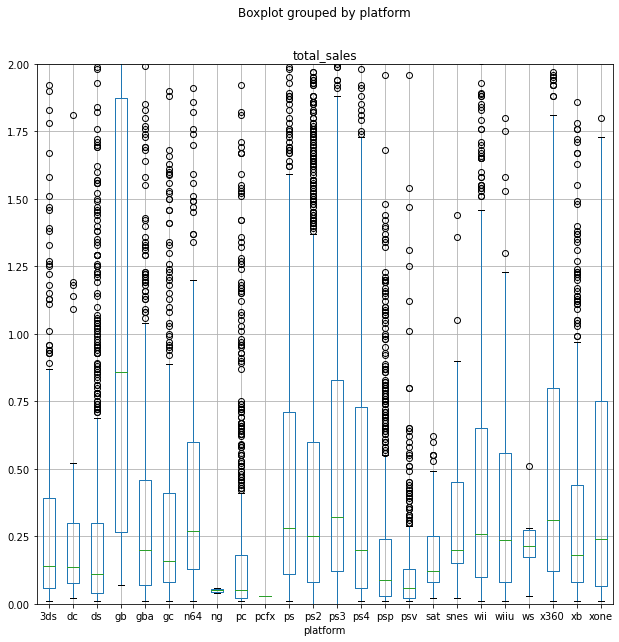

In [425]:
modern_ice = ice.query('year_of_release >= 1996')
gaming_by_platform = modern_ice.pivot_table(index='platform',values='total_sales',aggfunc='sum')
gaming_by_platform.columns = ['total_sales']

gaming_by_platform_avg = modern_ice.pivot_table(index='platform',values='total_sales')
gaming_by_platform_avg.columns = ['avg_sales']

print(gaming_by_platform.sort_values(by='total_sales',ascending=False).head(5).index)
print()
print(gaming_by_platform_avg.sort_values(by='avg_sales',ascending=False).head(5).index)

gaming_by_platform.sort_values(by='total_sales',ascending=False).plot(title='gaming by platform total sales',kind='bar',figsize=(10,10))
plt.show()
gaming_by_platform_avg.sort_values(by='avg_sales',ascending=False).plot(title='gaming by platform avg sales',kind='bar',figsize=(10,10))
plt.show()
total_sales = modern_ice.boxplot(column='total_sales',by='platform',figsize=(10,10))
plt.show()
total_sales = modern_ice.boxplot(column='total_sales',by='platform',figsize=(10,10))
total_sales.set_ylim([0,2])
plt.show()

'ps2', 'x360', 'ps3', 'wii', 'ps' are the most popular platforms in total sales. But 'gb', 'wii', 'x360', 'ps4', 'ps3' are the top 5 in avg sales. Outside of the outliers in the wii and ds, the differences aren't signifigant. Zoomed in, the IQR ranges are varietal to say the least and prove the table right about the top avgs.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


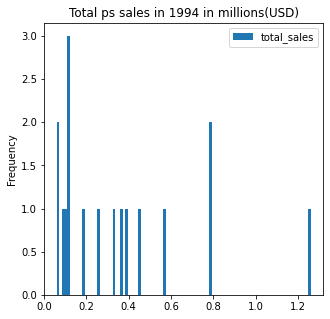

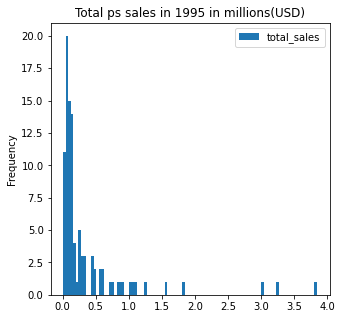

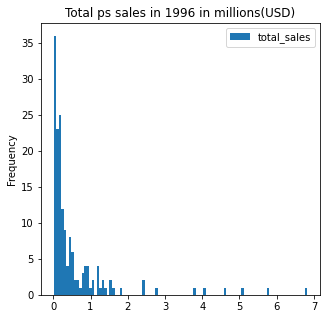

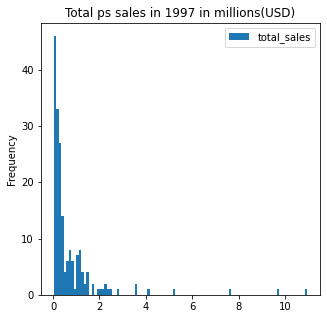

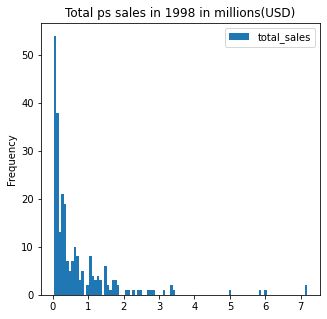

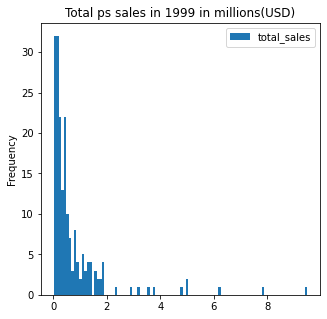

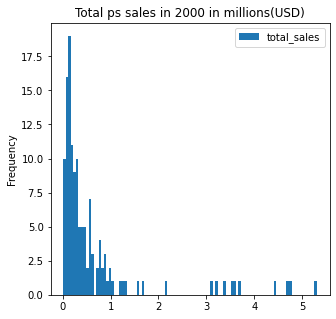

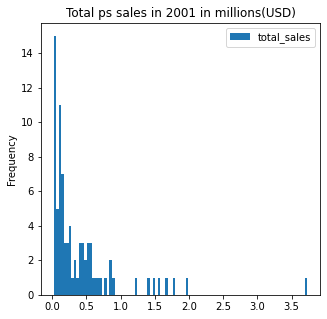

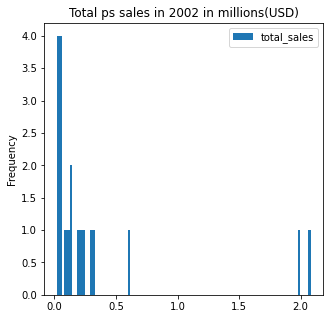

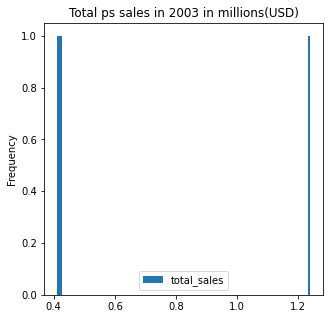

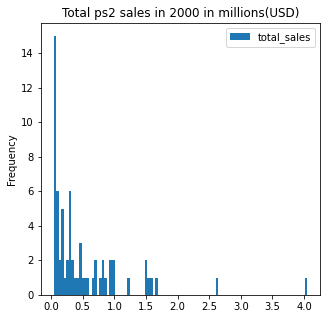

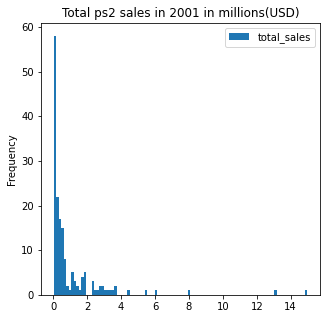

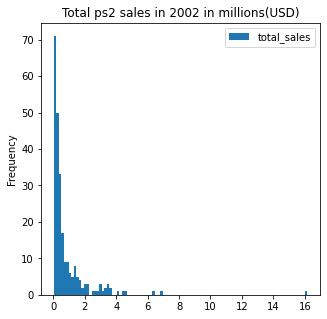

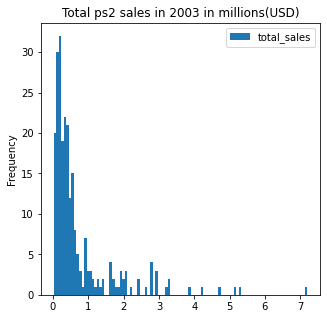

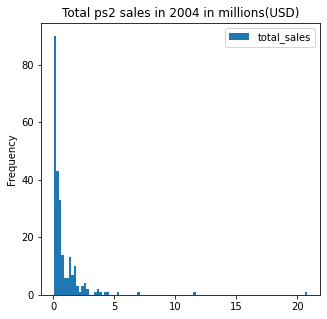

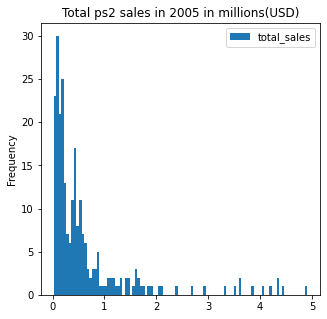

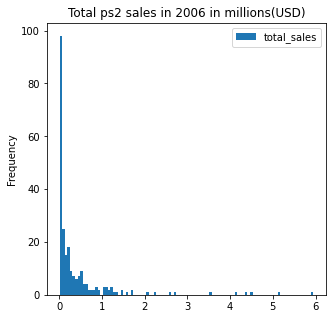

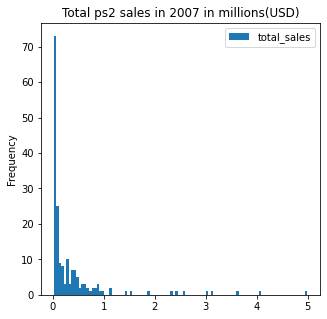

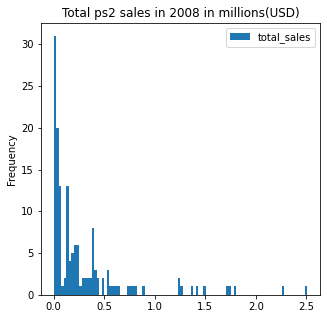

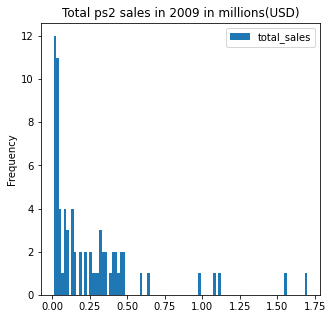

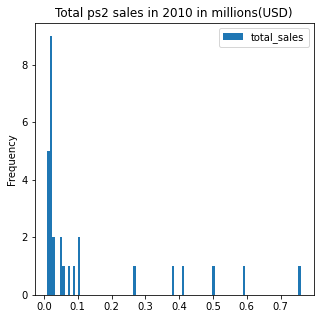

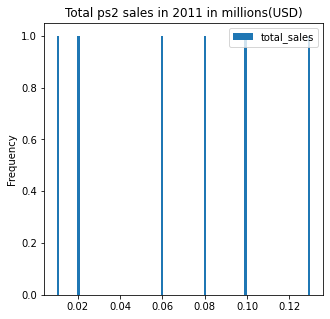

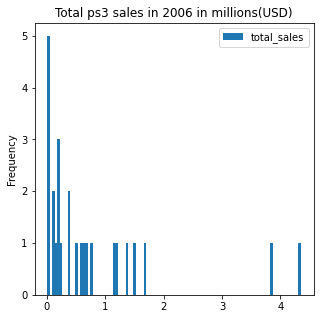

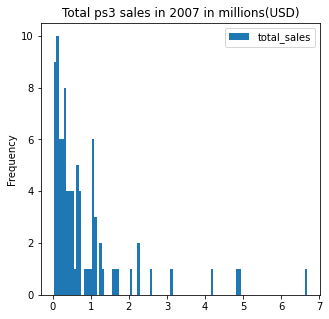

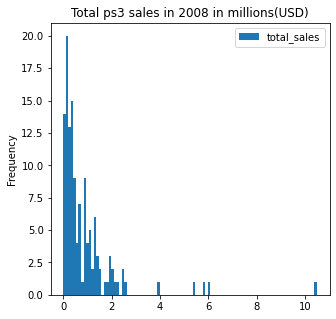

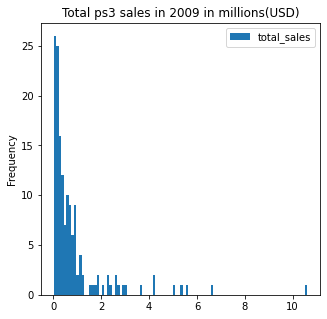

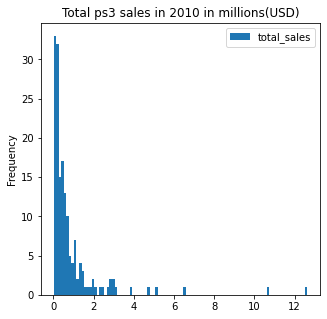

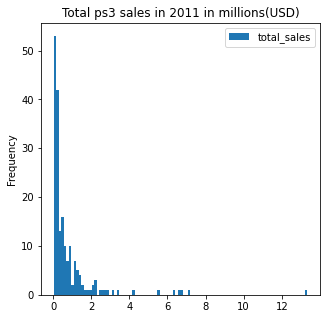

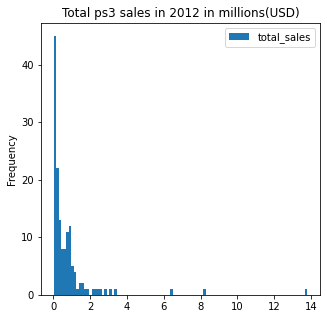

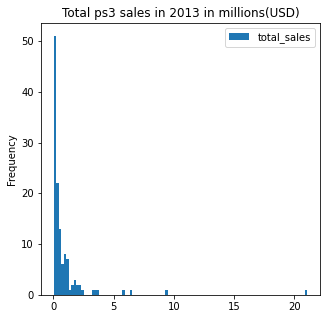

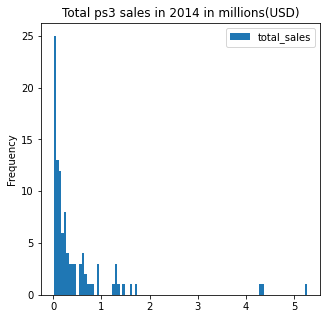

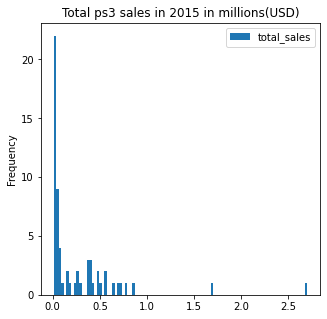

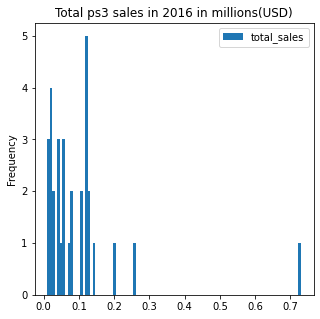

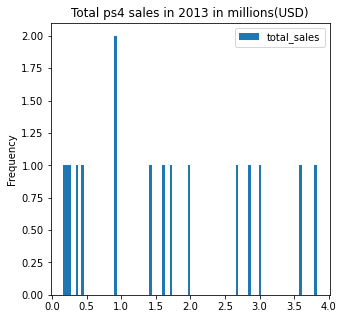

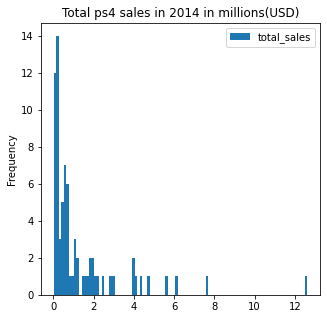

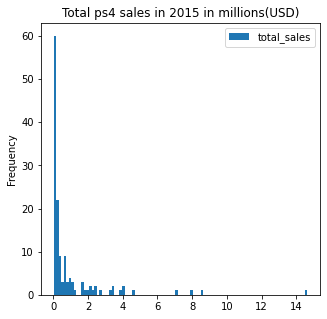

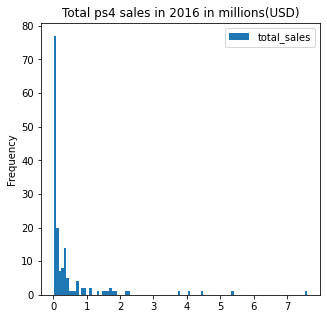

In [440]:
#https://pastebin.com/xsTm2pTv
#https://pastebin.com/qSk6ZSty

top_platforms = ['ps','ps2','ps3','ps4'] 
#we can't use gc, wii or xb, x360 because the second consoles had a signifigant increase compared to their predecessor.


def games_by_year(df,platform_list):
    
    for platform in platform_list:
        platform_years = sorted(list(dict(df.query('platform == @platform')['year_of_release'].value_counts()))) #.sort() returns None
        for year in platform_years:
            games_this_year = df.query('year_of_release == @year and platform == @platform')
            games_this_year.plot(title=f'Total {platform} sales in {year} in millions(USD)', kind='hist',y='total_sales',bins=100,figsize=(5,5))
            #games_this_year.query('total_sales < 1').plot(title=f'Total {platform} sales in {year} under 1 million(USD)', kind='hist',y='total_sales',bins=100,figsize=(5,5))

games_by_year(ice,top_platforms)

7 years. Using the ps platforms as an example, it takes 7 years on average for the sales to drop. About the lifecycle of a platform. According to the data, ps4 should have good sales until about 2020, when ps5 should come out.

In [427]:
gaming_by_platform_current_era = modern_ice.query('year_of_release >= 2016').pivot_table(index='platform',values='total_sales',aggfunc='sum')
gaming_by_platform_current_era.columns = ['total_sales']
print(gaming_by_platform_current_era.sort_values(by='total_sales',ascending=False).head(5))
#print(gaming_by_platform_current_era.sort_values(by='total_sales',ascending=False).head(5).index)

gaming_by_platform_avg_current_era = modern_ice.query('year_of_release >= 2016').pivot_table(index='platform',values='total_sales')
gaming_by_platform_avg_current_era.columns = ['avg_sales']
print(gaming_by_platform_avg_current_era.sort_values(by='avg_sales',ascending=False).head(5))
#print(gaming_by_platform_current_era.sort_values(by='total_sales',ascending=False).head(5).index)

          total_sales
platform             
ps4             69.15
xone            25.82
3ds             15.10
pc               5.22
wiiu             4.30
          avg_sales
platform           
ps4        0.434906
wiiu       0.390909
3ds        0.351163
xone       0.326835
x360       0.152500


The current winning platforms are by total sales: 'ps4', 'xone', 'pc', 'wiiu', '3ds', and avg_sales: 'ps4', 'xone', 'pc', 'wiiu', '3ds'.

#### Sales vs Reviews

[Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.]

Correlation between critic score and total sales is 0.3322746220950547
Correlation between critic score and total sales is 0.17625000622750148


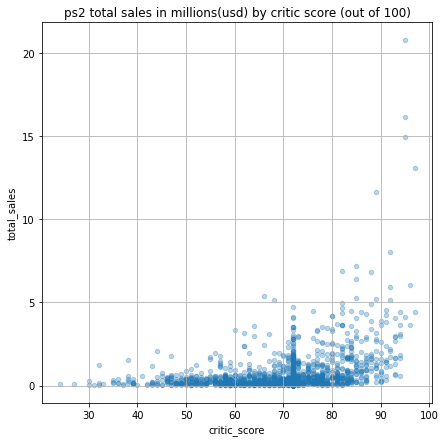

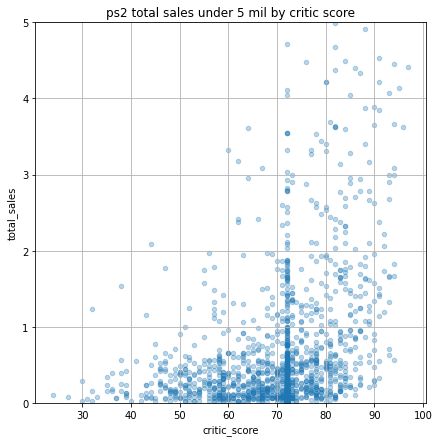

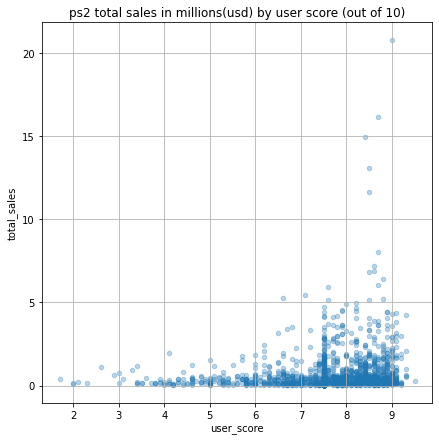

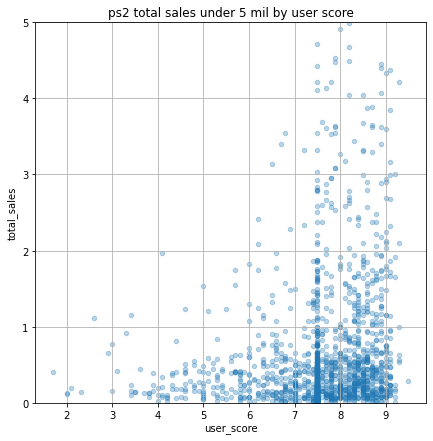

In [428]:
print('Correlation between critic score and total sales is',ice.query('platform == "ps2"')['critic_score'].corr(ice.query('platform == "ps2"')['total_sales']))
print('Correlation between critic score and total sales is',ice.query('platform == "ps2"')['user_score'].corr(ice.query('platform == "ps2"')['total_sales']))

ice.query('platform == "ps2"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, grid=True, figsize=(7,7), title='ps2 total sales in millions(usd) by critic score (out of 100)')
plt.show()
ice.query('platform == "ps2"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, grid=True, figsize=(7,7), ylim=(0,5), title='ps2 total sales under 5 mil by critic score')
plt.show()
ice.query('platform == "ps2"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, grid=True, figsize=(7,7), title='ps2 total sales in millions(usd) by user score (out of 10)')
plt.show()
ice.query('platform == "ps2"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, grid=True, figsize=(7,7), ylim=(0,5), title='ps2 total sales under 5 mil by user score')
plt.show()

Well reviewed games, both in user and critic scores, for the majority, tend to sell better. However, even with critic scores above 80 and user scores between 8 and 9, that still doesn't completely equate to extreme sales () above. Low positive correlation for both. As per scatterplots and .corr(). People don't trust ratings from other people, critics (companys) and or buy only extremely popular games.

#### Multi-platform Games

[Keeping your conclusions in mind, compare the sales of the same games on other platforms.]

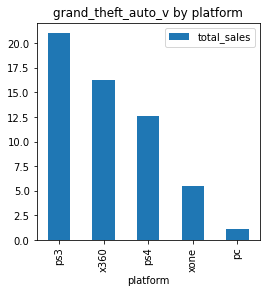

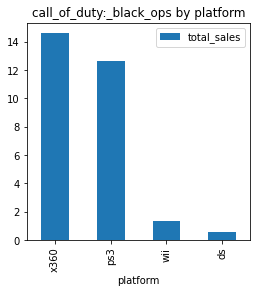

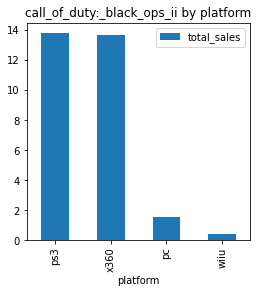

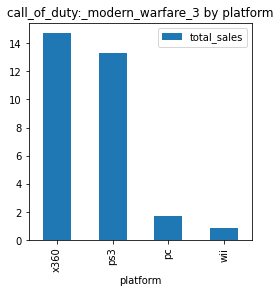

In [441]:
#Wait a bit for it to load.

#https://pastebin.com/Qs7TtvD0


game_counts = list(tuple(dict(modern_ice[modern_ice['name'].duplicated()].sort_values(by='total_sales',ascending=False).head(5).reset_index(drop=True)['name'].value_counts()).keys()))
#top 10 games without duplicates *removed gta twice, so we made it top 11, minus duplicate*

for game in game_counts: #_over_one:
    this_game = modern_ice[modern_ice['name'] == game].reset_index(drop=True) #.pivot_table(index='platform',values='total_sales',aggfunc='first')
    #print(this_game)
    #print(this_game_by_platform)
    this_game.plot(title=f'{game} by platform',x='platform',y='total_sales',kind='bar',figsize=(4,4))

For the the majority, x360 and ps3 over everything else, if you really want to get technical, x360 has the most sales.

#### Games by Genre

[Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?]

Index(['platform', 'shooter', 'racing', 'sports', 'role-playing'], dtype='object', name='genre')
Index(['platform', 'shooter', 'sports', 'racing', 'fighting'], dtype='object', name='genre')


<AxesSubplot:title={'center':'sales by genre'}, xlabel='genre'>

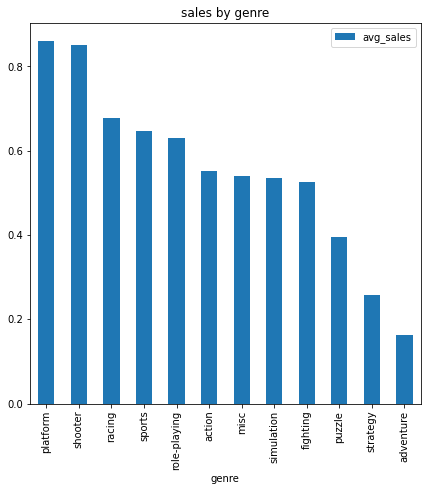

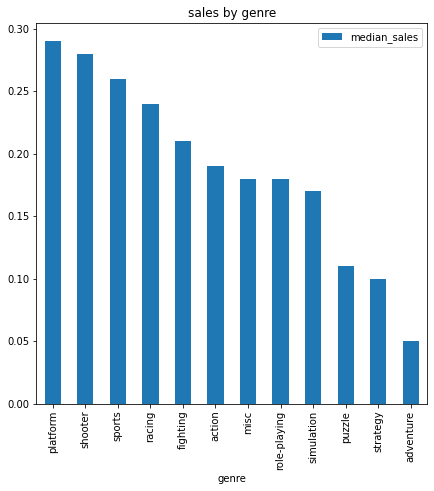

In [430]:
#games_by_genre = ice.pivot_table(index='genre',values='total_sales',aggfunc='sum')
#Sum of total sales is a poor metric for finding the most profitable genre. High overall sales figures can hide a lot of small games with low sales.
#Or 2-3 stars and a bunch of failures. It would be better to find a genre of games that consistently generate high revenue; to do so, we should consider average or median sales.

games_by_genre = modern_ice.pivot_table(index='genre',values='total_sales')
games_by_genre.columns = ['avg_sales']

print(games_by_genre.sort_values(by='avg_sales',ascending=False).head(5).index)
games_by_genre.sort_values(by='avg_sales',ascending=False).plot(title='sales by genre',kind='bar',figsize=(7,7))

games_by_genre_median = modern_ice.pivot_table(index='genre',values='total_sales',aggfunc='median')
games_by_genre_median.columns = ['median_sales']

print(games_by_genre_median.sort_values(by='median_sales',ascending=False).head(5).index)
games_by_genre_median.sort_values(by='median_sales',ascending=False).plot(title='sales by genre',kind='bar',figsize=(7,7))

On avg 'platform', 'shooter', 'racing', 'sports', 'role-playing' are the best selling genre. But for median, its 'platform', 'shooter', 'sports', 'racing', 'fighting'.

### Creating a user profile for each region

[For each region (NA, EU, JP), determine: The top five platforms. Describe variations in their market shares from region to region.The top five genres. Explain the difference. Do ESRB ratings affect sales in individual regions?]

Index(['gb', 'x360', 'wii', 'n64', 'xone'], dtype='object', name='platform')
Index(['gb', 'ps4', 'wii', 'ps3', 'x360'], dtype='object', name='platform')
Index(['gb', 'snes', 'ws', '3ds', 'sat'], dtype='object', name='platform')
Index(['ps4', 'ps3', 'ps2', 'gb', 'wii'], dtype='object', name='platform')


<AxesSubplot:title={'center':'gaming by genre other'}, xlabel='platform'>

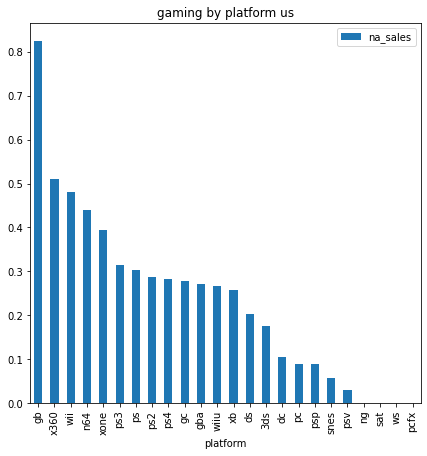

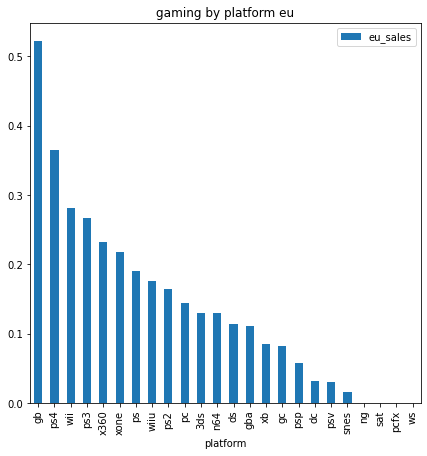

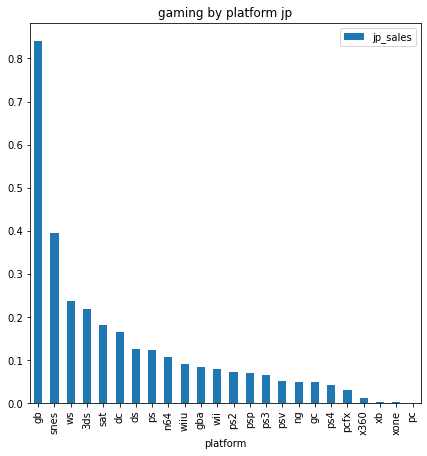

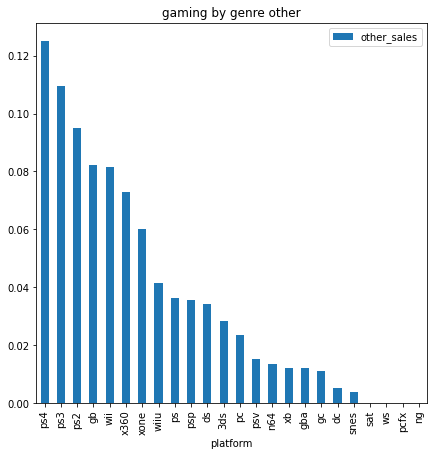

In [431]:
#The top five platforms
#using mean instead of sum because it accounts for the poor rated and poor selling games

gaming_by_platform_na = modern_ice.pivot_table(index='platform',values='na_sales')
print(gaming_by_platform_na.sort_values(by='na_sales',ascending=False).head(5).index)
gaming_by_platform_na.sort_values(by='na_sales',ascending=False).plot(title='gaming by platform us',kind='bar',figsize=(7,7))

gaming_by_platform_eu = modern_ice.pivot_table(index='platform',values='eu_sales')
print(gaming_by_platform_eu.sort_values(by='eu_sales',ascending=False).head(5).index)
gaming_by_platform_eu.sort_values(by='eu_sales',ascending=False).plot(title='gaming by platform eu',kind='bar',figsize=(7,7))

gaming_by_platform_jp = modern_ice.pivot_table(index='platform',values='jp_sales')
print(gaming_by_platform_jp.sort_values(by='jp_sales',ascending=False).head(5).index)
gaming_by_platform_jp.sort_values(by='jp_sales',ascending=False).plot(title='gaming by platform jp',kind='bar',figsize=(7,7))

gaming_by_platform_other = modern_ice.pivot_table(index='platform',values='other_sales')
print(gaming_by_platform_other.sort_values(by='other_sales',ascending=False).head(5).index)
gaming_by_platform_other.sort_values(by='other_sales',ascending=False).plot(title='gaming by genre other',kind='bar',figsize=(7,7))

In order descending, 'wii', 'ps', 'x360', 'xone', 'ps3' are the us top 5.
In order descending, 'ps4', 'ps', 'wii', 'ps3', 'x360' are the eu top 5.
In order descending, 'ps', '3ds', 'dc', 'ds', 'wiiu' are the jp top 5.
In order descending, 'ps4', 'ps3', 'ps2', 'wii', 'x360' are the other top 5.

jp prefers ds over the other platforms, eu prefers ps3,and ps2 over x360 and other still has prefers the ps2.


7613.82


<AxesSubplot:ylabel='total_share'>

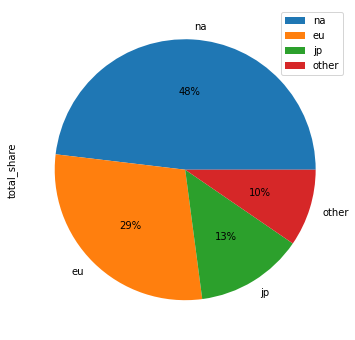

In [432]:
#Describe variations in their market shares from region to region.

#https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

#print(modern_ice['na_sales'].sum())
#print(modern_ice['eu_sales'].sum())
#print(modern_ice['jp_sales'].sum())
#print(modern_ice['other_sales'].sum())
print(modern_ice['total_sales'].sum())


shares = pd.DataFrame({'name':['na','eu','jp','other'],'total_share':[modern_ice['na_sales'].sum(),modern_ice['eu_sales'].sum(),modern_ice['jp_sales'].sum(),modern_ice['other_sales'].sum()]})
#shares = pd.DataFrame({'name':['na','eu','jp','other'],'total_share':[ice['na_sales'].mean(),ice['eu_sales'].mean(),ice['jp_sales'].mean(),ice['other_sales'].mean()]})
shares.set_index('name').plot(y='total_share',kind='pie',autopct='%1.0f%%',figsize=(6,6))

The total shares of the 5305930000 in usd market of video games is 51% na, 30% eu, 8% jp and 11% other.

This region is na

              mean  median     sum       var       std
platform                                              
x360      0.509869    0.18  585.84  1.158710  1.076434
ps2       0.287619    0.09  543.60  0.367296  0.606050
wii       0.481084    0.15  412.77  3.518019  1.875638
ps3       0.314848    0.13  383.80  0.359978  0.599982
ps        0.301905    0.09  310.66  0.317352  0.563340


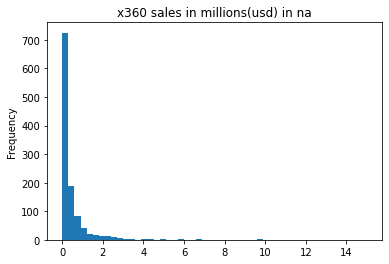

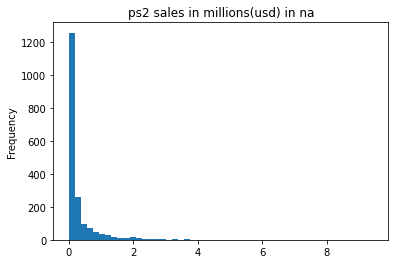

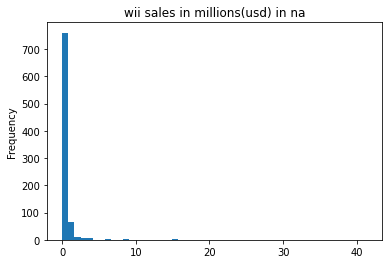

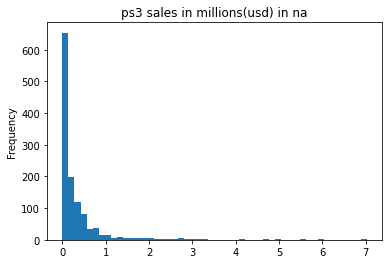

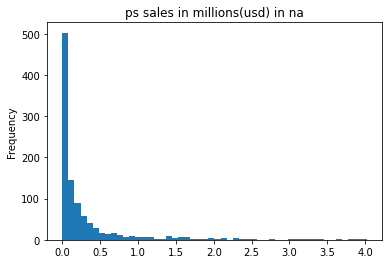



This region is eu

              mean  median     sum       var       std
platform                                              
ps3       0.266514    0.08  324.88  0.374028  0.611578
ps2       0.164439    0.05  310.79  0.143368  0.378640
x360      0.232150    0.06  266.74  0.244529  0.494499
wii       0.281224    0.02  241.29  1.745215  1.321066
ps        0.190641    0.06  196.17  0.151987  0.389855


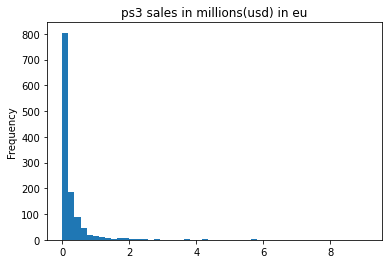

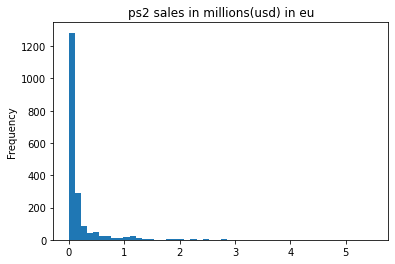

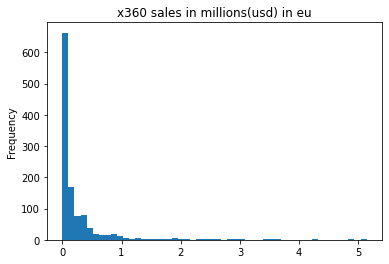

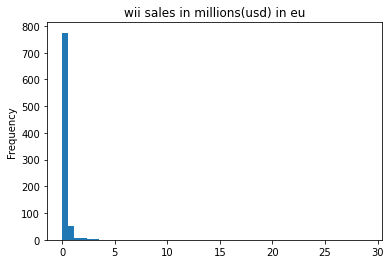

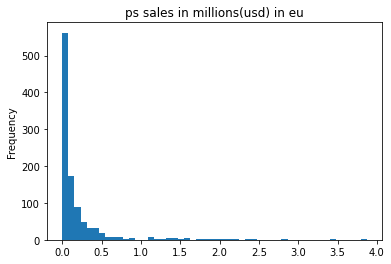



This region is jp

              mean  median     sum       var       std
platform                                              
ds        0.124651    0.01  171.52  0.234515  0.484268
ps2       0.072354    0.00  136.75  0.044192  0.210218
ps        0.122556    0.00  126.11  0.114334  0.338133
3ds       0.219192    0.06  100.39  0.301889  0.549444
ps3       0.064840    0.01   79.04  0.018228  0.135010


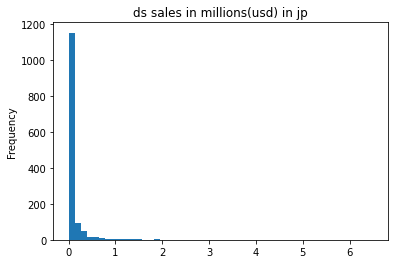

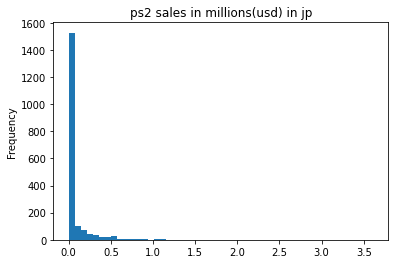

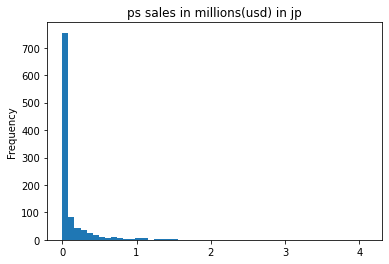

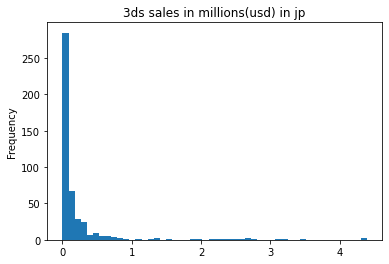

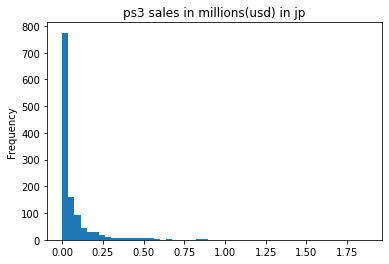



This region is other

              mean  median     sum       var       std
platform                                              
ps2       0.095138    0.02  179.81  0.129487  0.359843
ps3       0.109409    0.04  133.37  0.057572  0.239942
x360      0.073020    0.03   83.90  0.022059  0.148524
wii       0.081585    0.02   70.00  0.138652  0.372360
ps4       0.125207    0.03   48.33  0.065720  0.256358


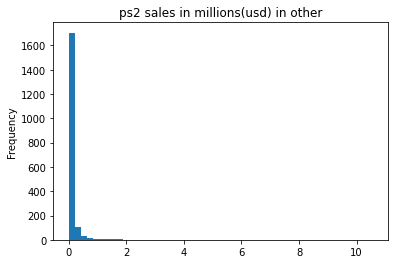

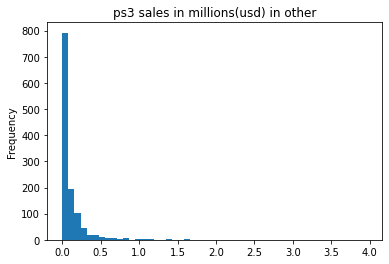

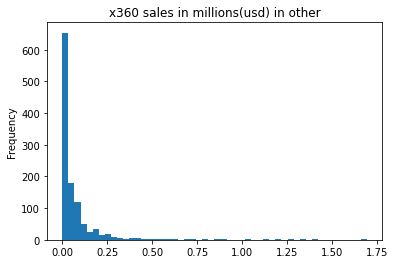

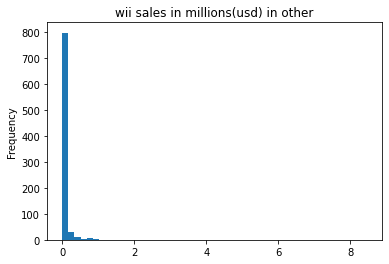

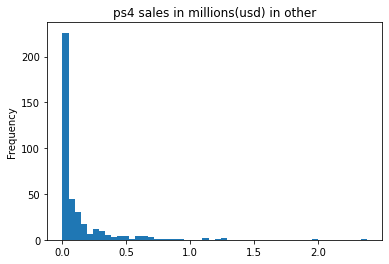

In [433]:
#https://pastebin.com/jzAFyyXd

sales_by_region = ['na_sales','eu_sales','jp_sales','other_sales']

for region in sales_by_region:
    region_name = region.split('_')
    region_name = region_name[0]
    print(f'This region is {region_name}')
    print()
    new_table = modern_ice.pivot_table(index='platform',values=f'{region}',aggfunc=['mean','median','sum','var','std'])
    new_table.columns = ['mean','median','sum','var','std']
    new_table = new_table.sort_values(by='sum',ascending=False).head(5)
    print(new_table)
    new_platform_list = list(new_table.index)
    for platform in new_platform_list:
        platform_this_region = modern_ice.query('platform == @platform')[region]
        platform_this_region.plot(kind='hist',bins=50,title=f'{platform} sales in millions(usd) in {region_name}')
        plt.show()
        #platform_this_region.plot(kind='hist',bins=50,title=f'{platform} sales in under 1 million(usd) in {region_name}',xlim=(0,1))
        #plt.show()
        print()
    print()


The most popular consoles in all regions are not uniform in low variance, have low standard devition and for the majority, skew right. Which means the mean is greater than the median.

Index(['shooter', 'platform', 'sports', 'racing', 'fighting'], dtype='object', name='genre')
Index(['shooter', 'platform', 'racing', 'sports', 'action'], dtype='object', name='genre')
Index(['role-playing', 'platform', 'puzzle', 'simulation', 'fighting'], dtype='object', name='genre')
Index(['shooter', 'racing', 'sports', 'platform', 'action'], dtype='object', name='genre')


<AxesSubplot:title={'center':'gaming by genre other'}, xlabel='genre'>

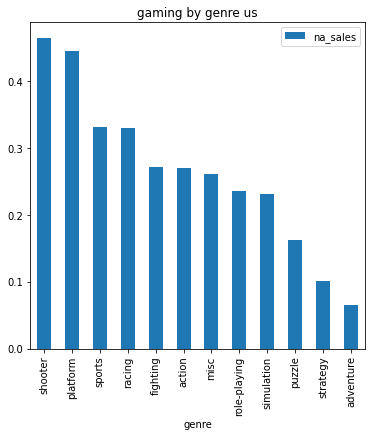

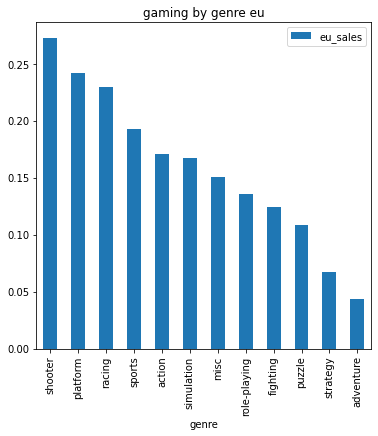

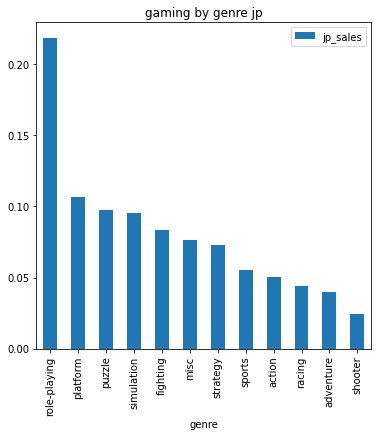

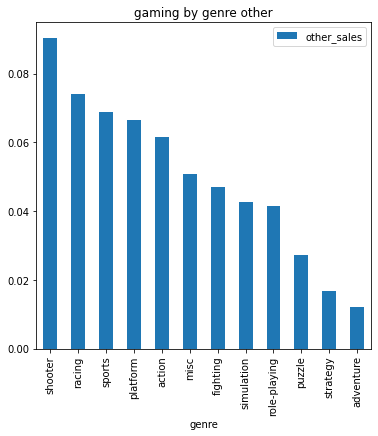

In [434]:
#The top five genres. Explain the difference.
#mean is better than sum

gaming_by_genre_na = modern_ice.pivot_table(index='genre',values='na_sales')
print(gaming_by_genre_na.sort_values(by='na_sales',ascending=False).head(5).index)
gaming_by_genre_na.sort_values(by='na_sales',ascending=False).plot(title='gaming by genre us',kind='bar',figsize=(6,6))

gaming_by_genre_eu = modern_ice.pivot_table(index='genre',values='eu_sales')
print(gaming_by_genre_eu.sort_values(by='eu_sales',ascending=False).head(5).index)
gaming_by_genre_eu.sort_values(by='eu_sales',ascending=False).plot(title='gaming by genre eu',kind='bar',figsize=(6,6))

gaming_by_genre_jp = modern_ice.pivot_table(index='genre',values='jp_sales')
print(gaming_by_genre_jp.sort_values(by='jp_sales',ascending=False).head(5).index)
gaming_by_genre_jp.sort_values(by='jp_sales',ascending=False).plot(title='gaming by genre jp',kind='bar',figsize=(6,6))

gaming_by_genre_other = modern_ice.pivot_table(index='genre',values='other_sales')
print(gaming_by_genre_other.sort_values(by='other_sales',ascending=False).head(5).index)
gaming_by_genre_other.sort_values(by='other_sales',ascending=False).plot(title='gaming by genre other',kind='bar',figsize=(6,6))

In order descending, 'misc', 'shooter', 'platform', 'sports', 'racing' are the us top 5. 
In order descending, 'shooter', 'misc', 'racing', 'platform', 'sports' are the eu top 5. 
In order descending, 'role-playing', 'puzzle', 'platform', 'simulation', 'misc' are the jp top 5. 
In order descending, 'shooter', 'misc', 'sports', 'racing', 'action' for other. 

Index(['e', 'e10+', 'm', 't', 'rp'], dtype='object', name='rating')
Index(['m', 'e', 'e10+', 't', 'rp'], dtype='object', name='rating')
Index(['rp', 'e', 'e10+', 'm', 't'], dtype='object', name='rating')
Index(['m', 'e', 'e10+', 't', 'rp'], dtype='object', name='rating')


<AxesSubplot:title={'center':'gaming by genre other'}, xlabel='rating'>

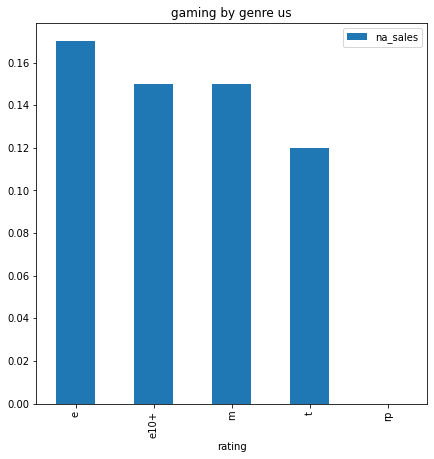

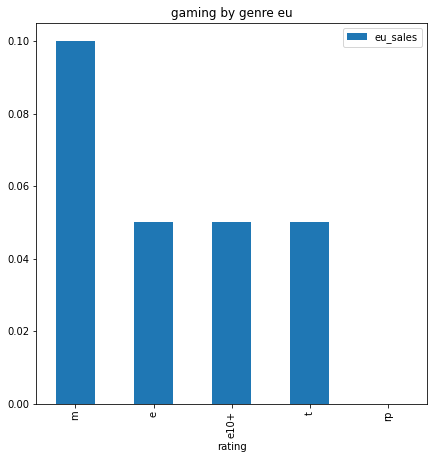

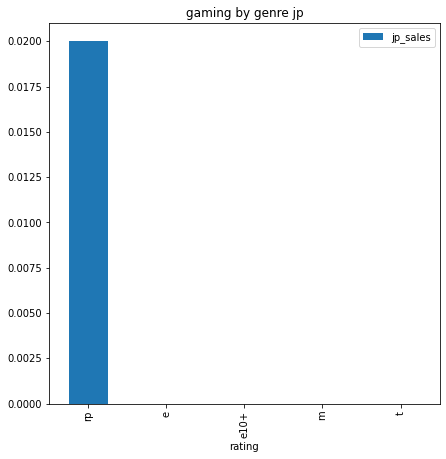

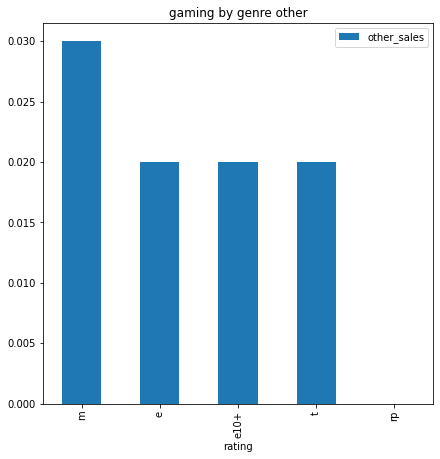

In [435]:
#Do ESRB ratings affect sales in individual regions?

#using mean instead of sum 



gaming_by_rating_na = modern_ice.pivot_table(index='rating',values='na_sales',aggfunc='median')
print(gaming_by_rating_na.sort_values(by='na_sales',ascending=False).head(5).index)
gaming_by_rating_na.sort_values(by='na_sales',ascending=False).plot(title='gaming by genre us',kind='bar',figsize=(7,7))

gaming_by_rating_eu = modern_ice.pivot_table(index='rating',values='eu_sales',aggfunc='median')
print(gaming_by_rating_eu.sort_values(by='eu_sales',ascending=False).head(5).index)
gaming_by_rating_eu.sort_values(by='eu_sales',ascending=False).plot(title='gaming by genre eu',kind='bar',figsize=(7,7))

gaming_by_rating_jp = modern_ice.pivot_table(index='rating',values='jp_sales',aggfunc='median')
print(gaming_by_rating_jp.sort_values(by='jp_sales',ascending=False).head(5).index)
gaming_by_rating_jp.sort_values(by='jp_sales',ascending=False).plot(title='gaming by genre jp',kind='bar',figsize=(7,7))

gaming_by_rating_other = modern_ice.pivot_table(index='rating',values='other_sales',aggfunc='median')
print(gaming_by_rating_other.sort_values(by='other_sales',ascending=False).head(5).index)
gaming_by_rating_other.sort_values(by='other_sales',ascending=False).plot(title='gaming by genre other',kind='bar',figsize=(7,7))


In order descending, 'e', 'e10+', 'm', 't', 'rp' are the us top 5. 
In order descending, 'm', 'e', 'e10+', 't', 'rp' are the eu top 5. 
In order descending, 'rp', 'e', 'e10+', 'm', 't' misc are the jp top 5. 
In order descending, 'm', 'e', 'e10+', 't', 'rp', misc for other. 

e and m everywhere else but jp. In j m sells poorly, my guess due to shooters and action not being popular there. Or difference in age distribution.

### Test the following hypotheses

[Average user ratings of the Xbox One and PC platforms are the same. Average user ratings for the Action and Sports genres are different. Set the alpha threshold value yourself. Explain: How you formulated the null and alternative hypotheses What significance level you chose to test the hypotheses, and why]

The null hypothesis by default determines the equality in averages across two equal samples. Therefore, the alt hypothesis, must be the opposite. I chose the alpha as 0.05 because it is the most commonly used alpha. 

In [438]:
#print(ice[(ice['platform'] == 'pc') | (ice['platform'] == 'xone')]['platform'].value_counts())

# Test the hypotheses
sample1 = list(modern_ice.query('platform == "xone"')['user_score'])
sample2 = list(modern_ice.query('platform == "pc"')['user_score']) #We do not need to use .head() to make samples equal in sizes. ttest_ind can work with samples of different sizes.

results = st.ttest_ind(sample1, sample2, equal_var = False) 

alpha = 0.05 #critical statistical significance level. 
#The significance level is the total probability that an empirically measured value will be far from the mean. 

#is less than alpha, we accept the hypothesis that both are equal.

#since the p-value based on the value not being equal, we subtract from 1 rather than by itself.

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
    print("The means of both are the different.")
else:
    print('We cannot reject the null hypothesis')
    print("The means of both are the same.")
    

p-value:  5.211851547239432e-05
We reject the null hypothesis
The means of both are the different.


The p.value is less than the alpha, which means the average user value are not the same. The null hypothesis is false.

In [439]:
#print(ice[(ice['genre'] == 'sports') | (ice['genre'] == 'action')]['genre'].value_counts())

# Test the hypotheses
sample1 = list(modern_ice.query('genre == "sports"')['user_score'])
sample2 = list(modern_ice.query('genre == "action"')['user_score']) #We do not need to use .head() to make samples equal in sizes. ttest_ind can work with samples of different sizes.

results = st.ttest_ind(sample1, sample2, equal_var = False)

alpha = 0.05 

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We cannot reject the alt hypothesis')
    print("The means of both are the different.")
else:
    print('We reject the alt hypothesis')
    print("The means of both are the same.")
    

p-value:  0.1818322160288724
We reject the alt hypothesis
The means of both are the same.


The p.value is less than the alpha, which means the average user value for sports and action are not the same. The alt hypothesis is false.

### General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]


In summary, shooting games for the majority sell well in most places. Countries listed as other tend to be slower in recieving newer consoles, therefore the sales of games in those places are different in timescale. It takes 7 years average before a console declines in sales. Japans market is completely different from the majority and prefers rpg and puzzle games. And finally, review scores help, but only farely little. Market games based on genre and region. Then you'll be able to tell which will sell well.